In [2]:

import subprocess
import numpy as np
import copy
import matplotlib.pyplot as plt
import emcee
import pandas as pd
from  test_smmcmc import casasibarramaud
import sys
import os
from smmcmc import smmcmc


In [3]:
from scipy.interpolate import interp1d

XENONnT_x = np.array([5.97102706329433, 6.056990777910455, 6.160566422181327, 6.289002969105092, 6.5088471281204665, 6.649315180341909, 6.912072847559385, 7.146855289006537, 7.542319101684038, 8.087066424421094, 8.716394690763698, 9.370006512226404, 9.900913550722128, 10.84673824252975, 12.097687802766076, 13.502192361831488, 14.813291425564906, 16.184288986599853, 17.682174911494293, 19.53012730021894, 21.49972419743351, 22.970662542958756, 24.61205840374446, 26.769602191914576, 29.22532137596798, 32.409249165849104, 36.080037270419176, 39.10348669193098, 43.25867328241102, 47.763894297413685, 53.70917014508595, 59.0249988759682, 65.64360614159538, 73.62702189370627, 83.18115289013227, 93.54608094837315, 105.99199228989718, 121.92479306630726, 139.87147841454845, 162.4975786888632, 181.52582857500772, 202.21909085340548, 226.4262048439145, 252.6002626785199, 291.3108631068599, 333.3020301259782, 372.05300195829216, 421.79266907745773, 481.42467348270446, 554.7707562117209, 626.9474392737438, 747.7640714442148, 942.0297063780309])
XENONnT_y = np.array([2.5760550137487362e-45, 2.257052231065699e-45, 1.8644568822803518e-45, 1.4928965949933253e-45, 1.105617534806812e-45, 8.323210001311656e-46, 6.0876924262739836e-46, 4.345504331686108e-46, 2.7671708023896064e-46, 1.572951366283984e-46, 8.969554982853953e-47, 5.392749631502421e-47, 3.5220318887703177e-47, 2.198924380469394e-47, 1.2602825785084277e-47, 7.820726293337094e-48, 5.583459697094887e-48, 4.2515168349127356e-48, 3.384706823829771e-48, 2.5917493016275825e-48, 2.200899635821844e-48, 1.9701509179759674e-48, 1.79128804738196e-48, 1.6145318239053106e-48, 1.4985845649553376e-48, 1.3791861942476244e-48, 1.3103072786569789e-48, 1.2960597140268965e-48, 1.2888920164521623e-48, 1.3090621670581823e-48, 1.3596579690050732e-48, 1.4293181576840035e-48, 1.4902181187198353e-48, 1.58128111190344e-48, 1.7142774341776054e-48, 1.849451078839559e-48, 1.9857164798316082e-48, 2.224741555234201e-48, 2.481242639023368e-48, 2.783441331068163e-48, 3.102554533375169e-48, 3.37863416149619e-48, 3.734490830043362e-48, 4.155609564181945e-48, 4.7129812850069816e-48, 5.373983856373061e-48, 5.934984372956836e-48, 6.722843267987003e-48, 7.646322481752521e-48, 8.807594799595915e-48, 9.954680872471326e-48, 1.192167501135572e-47, 1.4877801670641071e-47])


DARWIN_x = np.array([5.019370689312379, 5.306228169512471, 5.609043574278622, 5.928525562968069, 6.375933322070177, 6.696452348467524, 7.079338616709975, 7.62326696766099, 8.236043695280694, 8.843833564429385, 9.717000170093796, 10.561918511656884, 11.399977187384316, 12.379361383574121, 13.600891801378552, 15.16803188438747, 17.42013174867331, 19.934692350218008, 22.354086062117567, 25.181029986110094, 28.2774185189776, 32.40283377887805, 37.302713689880335, 42.8890560122588, 49.28006082439272, 55.4359409299913, 61.59641169357462, 68.98805892924462, 76.79568952028552, 87.03576629753617, 98.40897118641182, 110.63876625522457, 34.642022243875296, 30.287186490311168, 26.660852938128663, 23.817261749525567, 21.129729875249147, 18.62635779649876, 16.262076533338963, 39.91772306315006, 121.69152315570066, 133.49171740459508, 147.47562696141975, 167.30060349253176, 186.56303457287598, 207.16649886869052, 229.57495446998018, 257.6577564850282, 287.174755661089, 324.03673343277455, 358.984294041315, 398.7844039550788, 447.09058661575784, 498.5541814959728, 551.3227193036437, 628.0508407709013, 741.7900017396892, 850.0543883156714, 973.6153260731186])
DARWIN_y = np.array([2.130629806477718e-45, 1.224820655315024e-45, 7.030204300777559e-46, 4.028408537380879e-46, 1.964677006064814e-46, 1.1511387370380414e-46, 7.100458903028015e-47, 4.404312334030655e-47, 2.540401603542657e-47, 1.5313909115358246e-47, 8.55424610600025e-48, 5.378650395778611e-48, 3.5029311706455416e-48, 2.081958710931208e-48, 1.4330313855560013e-48, 9.77019632309727e-49, 6.57681969544458e-49, 4.895531964012349e-49, 3.88980311678816e-49, 3.182047424724544e-49, 2.8792450753002266e-49, 2.6279777112839797e-49, 2.519849553811706e-49, 2.6059871173848738e-49, 2.518438315293593e-49, 2.675138480281378e-49, 2.8272979030203218e-49, 2.914541755136244e-49, 3.101095313371427e-49, 3.3419110847260513e-49, 3.6717095324174995e-49, 3.9281247211468844e-49, 2.6538680504841104e-49, 2.8154438121710766e-49, 3.125074750509987e-49, 3.60041879283561e-49, 4.449571899509925e-49, 5.5992476424207415e-49, 7.913413262196974e-49, 2.564710676229181e-49, 4.2545603904500244e-49, 4.709250222009875e-49, 5.0254377126465064e-49, 5.524469941427123e-49, 6.054373607601679e-49, 6.6574449611159294e-49, 7.358620797853764e-49, 8.162174046329158e-49, 9.109436548305364e-49, 9.970632413045008e-49, 1.1110645990989102e-48, 1.2093097616340145e-48, 1.3721462449011014e-48, 1.540856878979035e-48, 1.664237311744973e-48, 1.8649397313198265e-48, 2.207477860885409e-48, 2.480632187232526e-48, 2.8707894272888654e-48])

LZ_x = np.array([9.062457499188575, 9.220762239351968, 9.408949511121085, 9.573306839991526, 9.740535194104634, 9.910684725078232, 10.083806460588198, 10.26418355985332, 10.495280803616081, 10.68301827306557, 10.869631278647097, 11.06406505400631, 11.31783715491855, 11.582204499073086, 11.879384527427359, 12.164668484072877, 12.448816511265258, 12.739601801237388, 13.037179390283704, 13.341707936109064, 13.653349802419344, 13.972271145487957, 14.298642002744403, 14.632636383432173, 14.984039807909479, 15.403043915583073, 15.783068478440425, 16.328811400290224, 17.100552752388232, 17.857154280506077, 18.701129022526526, 19.64160059987848, 20.80876690175167, 22.172913455039403, 23.626488460653643, 25.175354520428666, 26.825758566905275, 28.58435705864444, 30.45824282725351, 32.45497368440491, 34.582602904226604, 36.849711704005955, 39.26544385421016, 41.839542557412244, 44.582389744865004, 47.50504794921386, 50.61930492223199, 53.937721177530136, 57.473680649993064, 61.24144467626261, 65.25620951398356, 69.5341676318012, 74.09257301730568, 78.9498107663272, 84.12547123424935, 89.64042904841219, 95.51692730027786, 101.77866725692763, 108.4509039537147, 115.56054805362271, 123.13627438414925, 131.20863758947152, 139.81019536434337, 148.97563976675517, 158.74193713897225, 169.14847720128205, 180.23723191978368, 192.0529247889654, 204.64321121183093, 218.0588707050828, 232.35401170457737, 247.58628979707171, 263.8171402584484, 281.11202583629057, 299.54070077617996, 319.1774921565869, 340.1015996670507, 362.3974150387147, 386.15486241556215, 411.46976103913886, 438.4442117095634, 467.18700858150174, 497.81407795597806, 530.4489458377744, 565.2232361441737, 602.2772015744516, 641.76028928122, 683.8317436251209, 728.6612484439006, 776.4296114263037, 827.3294933510014, 881.5661851317642, 939.3584358028642, 1000.9393347841657, 1066.5572519842956, 1136.4768395335186, 1210.9800991865684, 1290.3675197004825, 1374.9592887747804, 1465.096584441981, 1561.1429511169774, 1663.4857658551432, 1772.5378007329757, 1888.738887652669, 2012.5576922852003, 2144.4936043066127, 2285.078751551266, 2434.8801462056176, 2594.501971698578, 2764.5880195120567, 2945.824285739847, 3138.941737867443, 3344.719262931765, 3563.986808951486, 3797.6287322979774, 4046.5873645076877, 4311.866812921621, 4594.537010480881, 4895.738031011937, 5216.684687406188, 5558.671431239386, 5923.077573592098, 6311.372848128112, 6725.1233388678065, 7165.99779656473, 7635.774369160596, 8136.347773464358, 8669.736936980207, 9238.093140705918, 9702.672793479753])
LZ_y = np.array([3.7660209321421486e-46, 3.3272469534959e-46, 2.955921732401844e-46, 2.640623068004886e-46, 2.35480246035342e-46, 2.1073340166090174e-46, 1.884211139938894e-46, 1.665732410225069e-46, 1.4616898458114063e-46, 1.2944828859370863e-46, 1.1553859666645903e-46, 1.0272189377929102e-46, 9.087394557707165e-47, 7.95694358628825e-47, 6.950765243182099e-47, 6.064245772385637e-47, 5.334489946845258e-47, 4.698757897470233e-47, 4.147002789075566e-47, 3.6818734701316773e-47, 3.2905894090312646e-47, 2.9370035452400935e-47, 2.6231448701718504e-47, 2.3490280534131103e-47, 2.0832642040958938e-47, 1.8382303558445193e-47, 1.6163101005888327e-47, 1.4413609604782962e-47, 1.2734299545997104e-47, 1.1324177482806384e-47, 1.0014263563301775e-47, 8.924421112821699e-48, 7.907601918738237e-48, 7.269652630656786e-48, 6.921834704931165e-48, 6.780238977128077e-48, 6.686383309980256e-48, 6.651123725425242e-48, 6.670333113366371e-48, 7.086796188253478e-48, 7.734679583239379e-48, 8.470244705855973e-48, 9.262395882996328e-48, 9.969238638082958e-48, 1.0818059955952311e-47, 1.1846853393655723e-47, 1.2898869579796034e-47, 1.404430618899095e-47, 1.5225451582415144e-47, 1.6450489688434675e-47, 1.776555292173679e-47, 1.9176523531957171e-47, 2.0699555842236988e-47, 2.2247101256760395e-47, 2.363610178180904e-47, 2.5260556064156264e-47, 2.682112155815501e-47, 2.838633733658023e-47, 3.015864182738379e-47, 3.2257944516571502e-47, 3.460302749827018e-47, 3.744113397835144e-47, 4.006661511706734e-47, 4.298306080134857e-47, 4.599321006543802e-47, 4.851375620627923e-47, 5.141899388976751e-47, 5.494535541324381e-47, 5.905319393244727e-47, 6.334623374577941e-47, 6.743078513212147e-47, 7.174421441318471e-47, 7.629688429646594e-47, 8.125553797597402e-47, 8.657806719206713e-47, 9.193937705534377e-47, 9.697789125555901e-47, 1.0288425288691294e-46, 1.1004588801613326e-46, 1.1787588828429587e-46, 1.2626300981618678e-46, 1.3485740568103144e-46, 1.4403679979983176e-46, 1.5398897401477287e-46, 1.6454967837568316e-46, 1.7558127648309218e-46, 1.853817084690303e-46, 1.9497797859656894e-46, 2.058610776163894e-46, 2.1955668086614577e-46, 2.3416343036339366e-46, 2.50463233314896e-46, 2.691884287334551e-46, 2.888966754532571e-46, 3.082646380626442e-46, 3.2845707765810824e-46, 3.496359186494509e-46, 3.734347295428118e-46, 3.988534638185465e-46, 4.2395966211017736e-46, 4.4978058942783326e-46, 4.7855226635092636e-46, 5.09654125597987e-46, 5.453925542150247e-46, 5.839176655989555e-46, 6.224654916618586e-46, 6.638771101629104e-46, 7.080437764053093e-46, 7.551487792421072e-46, 8.046137331410362e-46, 8.581433784047199e-46, 9.147944503565112e-46, 9.751853914654277e-46, 1.0405629323093646e-45, 1.1087235370676241e-45, 1.1824851138220237e-45, 1.2605478839264618e-45, 1.3444100879694582e-45, 1.433162474275645e-45, 1.5248393688713278e-45, 1.6169311164413894e-45, 1.720363369372376e-45, 1.8242636702009452e-45, 1.9409586236410805e-45, 2.0591711707927703e-45, 2.1845833594689536e-45, 2.3265628441295695e-45, 2.4647036702316236e-45, 2.6198467106919588e-45, 2.7499498603957025e-45])

interpolator_XENONnT = interp1d(XENONnT_x, XENONnT_y, kind='linear', fill_value="extrapolate")
interpolator_D = interp1d(DARWIN_x ,DARWIN_y , kind='linear', fill_value="extrapolate")
interpolator_LZ = interp1d(LZ_x ,LZ_y , kind='linear', fill_value="extrapolate")

In [7]:
data=pd.read_csv('./test_smmcmc/Fermi_data.csv')

mass_fermi=data.iloc[:,0]

xs_fermi=data.iloc[:,1]
interpolate_ID = interp1d(mass_fermi, xs_fermi, kind='linear', fill_value="extrapolate")

In [8]:
def lambda1_fixed(parameters):

    other = parameters["OTHER"]

    lambda_1 = (other["mH1"]**2) * (np.cos(other["alpha"])**2)
    lambda_1 += (other["mH2"]**2) * (np.sin(other["alpha"])**2)
    lambda_1 = lambda_1/(other["v"]**2)

    return lambda_1

def lambda3_hsigma_fixed(parameters):

    minpar = parameters["MINPAR"]
    other = parameters["OTHER"]

    lambda3_hsigma = (other["mH1"]**2) * np.cos(other["alpha"])* np.sin(other["alpha"])
    lambda3_hsigma = lambda3_hsigma - ((other["mH2"]**2) * np.cos(other["alpha"]) * np.sin(other["alpha"]))
    lambda3_hsigma = lambda3_hsigma/(other["v"] * minpar["vSiInput"])

    return lambda3_hsigma

def lambda_sigma_fixed(parameters):

    minpar = parameters["MINPAR"]
    other = parameters["OTHER"]

    lambda_sigma = ((other["mH1"]**2) * (np.sin(other["alpha"])**2))
    lambda_sigma += ((other["mH2"]**2) * (np.cos(other["alpha"])**2))
    lambda_sigma = lambda_sigma/(minpar["vSiInput"]**2)

    return lambda_sigma

def boundedness_from_below(blocks):

    lambdas = blocks["MINPAR"]

    lambda_1 = lambdas["lambda1Input"]
    lambda_2 = lambdas["lam4EtaInput"]
    lambda_3 = lambdas["lamHEta3Input"]
    lambda_4 = lambdas["lambda4HEtaInput"]
    lambda_5 = lambdas["lambda5HEtaInput"]
    lambda_sigma = lambdas["lam4SigInput"]
    lambda_3hsigma = lambdas["lamHSigInput"]
    lambda_3etasigma = lambdas["lamEtaSigInput"]

    return ((lambda_1>=0)and(lambda_2>=0)and(lambda_sigma>=0)and
    (lambda_3 >= (-np.sqrt(lambda_1*lambda_2)))and
    (lambda_3hsigma >= (-np.sqrt(lambda_1*lambda_sigma)))and
    (lambda_3etasigma >= (-np.sqrt(lambda_2*lambda_sigma)))and
    ((lambda_3+lambda_4-np.abs(lambda_5))>=(-np.sqrt(lambda_1*lambda_2)))
    )

def perturbative_unitarity(blocks):

    lambdas = blocks["MINPAR"]
    lambda_1 = lambdas["lambda1Input"]
    lambda_2 = lambdas["lam4EtaInput"]
    lambda_3 = lambdas["lamHEta3Input"]
    lambda_4 = lambdas["lambda4HEtaInput"]
    lambda_5 = lambdas["lambda5HEtaInput"]
    lambda_sigma = lambdas["lam4SigInput"]
    lambda_3hsigma = lambdas["lamHSigInput"]
    lambda_3etasigma = lambdas["lamEtaSigInput"]

    return ((lambda_1 <= 4*np.pi) and (lambda_2 <= 4*np.pi) and
    (lambda_3 <= 4*np.pi) and (lambda_4 <= 4*np.pi) and
    (lambda_5 <= 4*np.pi) and (lambda_sigma <= 4*np.pi) and
    (lambda_3hsigma <= 4*np.pi) and (lambda_3etasigma <= 4*np.pi)
    )

def chi_masses(blocks):

    kappain = blocks["KAPPAIN"]
    chi_1 = kappain["Kap(1,1)"]
    chi_2 = kappain["Kap(2,2)"]
    chi_3 = kappain["Kap(3,3)"]

    return (chi_1 < chi_2 and chi_2 < chi_3)

def branching_ratios(model_decay:dict):

    alpha = model_decay["OTHER"]["alpha"]
    model_decay_ = model_decay["DECAY 25"]
    
    br1 = float(model_decay_["BR(hh_1 -> Ah_2 Ah_2 )"])
    br2 = float(model_decay_["BR(hh_1 -> FX0_1 FX0_1 )"])
    br3 = float(model_decay_["BR(hh_2 -> FX0_2 FX0_2 )"])
    br4 = float(model_decay_["BR(hh_2 -> FX0_3 FX0_3 )" ])
    
    return ((np.cos(alpha)**2) *(br1 + br2 + br3 +br4)) < 0.19

def constraint_ddetection(blocks):
    mass_chi01 = -blocks["MASS"]["FX0_1"]
    dark_relic = blocks["MICROMEGAS"]["Omega h^2 (Dark matter relic density)"]
    neutron_SI = blocks["MICROMEGAS"]["neutron SI"]
    neutron_SI = neutron_SI*dark_relic/0.12
    limit = interpolator_XENONnT(mass_chi01)
    return neutron_SI<= limit

def constraint_idetection(blocks):
    mass_chi01 = -blocks["MASS"]["FX0_1"]
    dark_relic = blocks["MICROMEGAS"]["Omega h^2 (Dark matter relic density)"]
    sigmaV = blocks["MICROMEGAS"]["sigma_v [cm^3/s] (indirect detection)"]
    Xi_2 = (dark_relic/0.12)**2
    sigmaV = sigmaV*Xi_2
    limit = interpolate_ID(mass_chi01)
    return sigmaV<= limit


In [9]:
parameters_test = {"MINPAR":{
            "lambda1Input": lambda1_fixed, #lambda1
            "lam4EtaInput" : [1e-6,1], #lambda2
            "lamHEta3Input" : [1e-6,1], #lambda3
            "lambda4HEtaInput" :[1e-6,1], #lambda4
            "lambda5HEtaInput": [1e-8,1], #lambda5
            "lam4SigInput" : lambda_sigma_fixed, #lambdasigma
            "lamHSigInput": lambda3_hsigma_fixed, #lambda3hsigma
            "lamEtaSigInput": [1e-6,1], #lambda3etasigma
            "vSiInput" : [0.5*1e+3, 10*1e+3],
            "mEta2Input": [1e+5,1e+7]
        },
        "KAPPAIN":{
            "Kap(1,1)": [0.01,1],
            "Kap(2,2)": [0.01,1],
            "Kap(3,3)": [0.01,1]
        },
        "COUPLINGSYNIN":{
            "ALL": casasibarramaud.Casas_Ibarra
        },
        "OTHER":{
            "alpha": [0.0 ,np.pi/2],
            "mH2": 500.0,
            "mH1": 125.0,
            "NuM": [1e-14, 0.90e-9],
            "v": 246.0 
        }
    }
    

In [10]:
data_experimental = { 
        "MASS":
        {
            "hh_1" : "0.0",
            "FX0_1" : "0.0",
            "FX0_2" : "0.0",
            "FX0_3" : "0.0",
            "etaR" : "0,0",
            "etaI" : "0,0",
            
        },
        "DECAY 25":
        {   
            "WIDTH": [3.7e-3,1.7e-3],
            "BR(hh_1 -> Ah_2 Ah_2 )": "0.0",
            "BR(hh_1 -> FX0_1 FX0_1 )" : "0.0",
            "BR(hh_2 -> FX0_2 FX0_2 )" : "0.0",
            "BR(hh_2 -> FX0_3 FX0_3 )" : "0.0"
        },
        "MICROMEGAS": 
        {
            "Xf (Freeze-out temperature)": "0.0",
            "Omega h^2 (Dark matter relic density)": "0.0" ,
            "neutron SI": "0.0",
            "sigma_v [cm^3/s] (indirect detection)": "0,0"
        }
    }


In [11]:

spheno_executable = "/home/f.herreras/SPheno-4.0.5/bin/SPhenoScotogenic_SLNV"

input_file = "/home/f.herreras/SPheno-4.0.5/Scoto_SLNV_11.10/Input_Files/LesHouches.in.Scotogenic_SLNV"

output_file = "/home/f.herreras/Code/SPheno.spc.Scotogenic_SLNV"


In [12]:
constraints_bs = [boundedness_from_below, perturbative_unitarity, chi_masses]
constraints_as = [branching_ratios,constraint_ddetection,constraint_idetection]
#constraints_as = [branching_ratios,constraint_ddetection]

In [ ]:

sampler2 = smmcmc(parameters_test, data_experimental, constraints_bs, constraints_as, 
                   spheno_executable, input_file, output_file, nWalkers=100,LikelihoodThreshold=0.9,AcceptedPoints=100000, LogParameterization=True,Steps=None, 
                   UseMicrOmegas=True, MicrOmegasFilePath="/home/f.herreras/micromegas_6.0.5/Scoto_SLNV_11.10/CalcOmega_with_DDetection_MOv5_4",WriteOnlyAccepted=True,OutputMCMCfile="output_mcmc_5.csv")



In [14]:
sampler2.run_micromegas()

In [15]:
sampler2.run()

  0%|          | 0/100000 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/Collider/.venv/lib64/python3.9/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/f.herreras/Code/smmcmc/smmcmc.py", line 924, in log_posterior_caller
    return self.log_posterior(params)
  File "/home/f.herreras/Code/smmcmc/smmcmc.py", line 898, in log_posterior
    self.run_micromegas()
  File "/home/f.herreras/Code/smmcmc/smmcmc.py", line 647, in run_micromegas
    chunk = os.read(master, 1024)  # Lee la salida en trozos
KeyboardInterrupt
  0%|          | 0/100000 [00:11<?, ?it/s]

emcee: Exception while calling your likelihood function:
  params: [0.82577687 0.28707633 0.67303305 0.79958959 0.6931104  0.39706643
 0.7987606  0.04633531 0.11939502 0.30223513 0.98925376 0.9750447 ]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [5]:
df = pd.read_csv("./output_mcmc_5.csv", delimiter=';')

In [6]:
for idx, col in enumerate(df.columns):
    print(f"Índice: {idx}, Columna: {col}")

Índice: 0, Columna: MINPAR lambda1Input
Índice: 1, Columna: MINPAR lam4EtaInput
Índice: 2, Columna: MINPAR lamHEta3Input
Índice: 3, Columna: MINPAR lambda4HEtaInput
Índice: 4, Columna: MINPAR lambda5HEtaInput
Índice: 5, Columna: MINPAR lam4SigInput
Índice: 6, Columna: MINPAR lamHSigInput
Índice: 7, Columna: MINPAR lamEtaSigInput
Índice: 8, Columna: MINPAR vSiInput
Índice: 9, Columna: MINPAR mEta2Input
Índice: 10, Columna: KAPPAIN Kap(1,1)
Índice: 11, Columna: KAPPAIN Kap(2,2)
Índice: 12, Columna: KAPPAIN Kap(3,3)
Índice: 13, Columna: COUPLINGSYNIN Yn(1,1)
Índice: 14, Columna: COUPLINGSYNIN Yn(1,2)
Índice: 15, Columna: COUPLINGSYNIN Yn(1,3)
Índice: 16, Columna: COUPLINGSYNIN Yn(2,1)
Índice: 17, Columna: COUPLINGSYNIN Yn(2,2)
Índice: 18, Columna: COUPLINGSYNIN Yn(2,3)
Índice: 19, Columna: COUPLINGSYNIN Yn(3,1)
Índice: 20, Columna: COUPLINGSYNIN Yn(3,2)
Índice: 21, Columna: COUPLINGSYNIN Yn(3,3)
Índice: 22, Columna: OTHER alpha
Índice: 23, Columna: OTHER mH2
Índice: 24, Columna: OTHER mH1

In [15]:
data = df.to_numpy()


In [16]:
data = data[data[:,51]>0.9]
len(data)

57887

In [17]:
data[:,38] = -data[:,38]

In [18]:
puntos_no_viables = data[data[:,48] > (0.120 + 0.0036)]

In [19]:
puntos_viables = data[data[:,48] < (0.120 - 0.0036)]

In [20]:
puntos_buenos = data[data[:,48] < (0.120 + 0.0036)]
puntos_buenos = puntos_buenos[puntos_buenos[:,48] > (0.120 - 0.0036)]

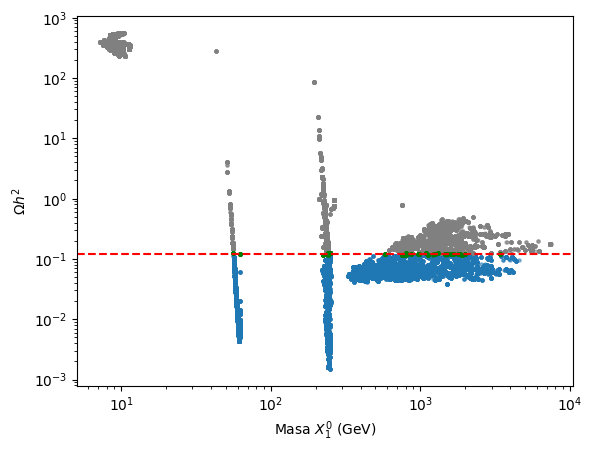

In [21]:
plt.scatter(puntos_viables[:,38], puntos_viables[:,48], s =5, alpha = 0.5)
plt.scatter(puntos_no_viables[:,38], puntos_no_viables[:,48], s =5,color = "grey", alpha = 0.5)
plt.scatter(puntos_buenos[:,38], puntos_buenos[:,48], s =5,color = "green", alpha = 0.5)
plt.axhline(y = 0.120, color='red', linestyle='--')
plt.xlabel(r"Masa $X^0_1$ (GeV)")
plt.ylabel(r"$\Omega h^2$")
plt.yscale('log')
plt.xscale('log')

In [30]:
ejex = len(data)

In [31]:
len(data)

136074

/tmp/ipykernel_159237/1618801053.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


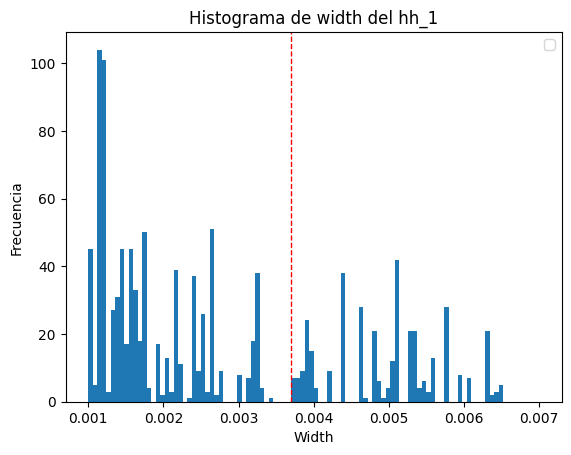

In [32]:
plt.hist(data[:,16],bins = 100, range = (1e-3,7e-3))
plt.axvline(x=3.7e-3, color="red", linestyle="--", linewidth=1)

plt.xlabel("Width")
plt.ylabel("Frecuencia")
plt.title("Histograma de width del hh_1")
plt.legend()

# Mostrar la gráfica
plt.show()

/tmp/ipykernel_159237/3063444622.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


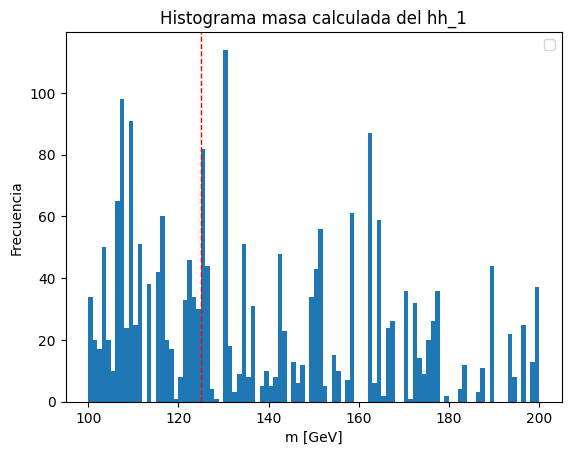

In [33]:
plt.hist(data[:,15],bins = 100,range= (100,200))
plt.axvline(x=125, color="red", linestyle="--", linewidth=1)

plt.xlabel("m [GeV]")
plt.ylabel("Frecuencia")
plt.title("Histograma masa calculada del hh_1")
plt.legend()

# Mostrar la gráfica
plt.show()

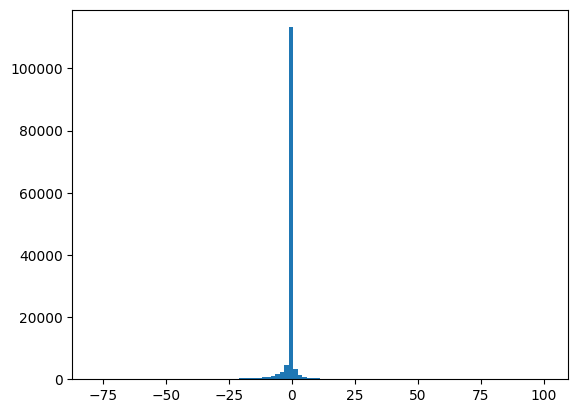

In [34]:
plt.hist(data[:,17],bins = 100)
plt.show()

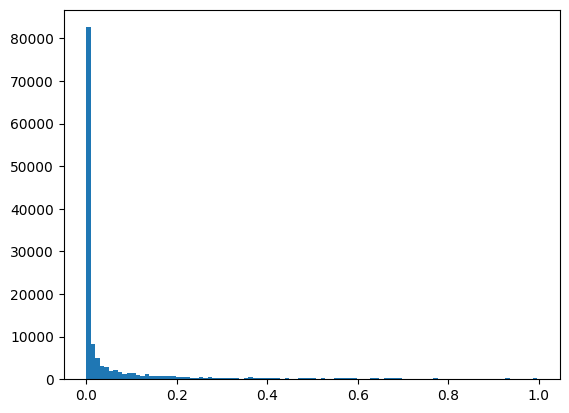

In [35]:
plt.hist(data[:,1],bins = 100)
plt.show()

In [36]:
data[:15] = data[:15].astype(float)

(array([1.13241e+05, 5.00100e+03, 3.29300e+03, 2.20000e+03, 1.61600e+03,
        1.31300e+03, 1.14200e+03, 8.85000e+02, 8.28000e+02, 5.63000e+02,
        5.04000e+02, 2.68000e+02, 3.11000e+02, 3.07000e+02, 3.92000e+02,
        4.30000e+02, 2.06000e+02, 2.12000e+02, 2.74000e+02, 2.05000e+02,
        1.48000e+02, 7.70000e+01, 1.63000e+02, 1.07000e+02, 2.48000e+02,
        1.54000e+02, 1.26000e+02, 9.40000e+01, 1.97000e+02, 1.19000e+02,
        8.30000e+01, 5.20000e+01, 8.40000e+01, 3.10000e+01, 1.38000e+02,
        2.50000e+01, 8.00000e+01, 1.66000e+02, 6.20000e+01, 5.60000e+01,
        8.40000e+01, 1.60000e+01, 1.40000e+01, 4.40000e+01, 5.50000e+01,
        6.60000e+01, 6.00000e+00, 3.70000e+01, 1.90000e+01, 1.40000e+01,
        5.30000e+01, 3.00000e+00, 2.00000e+01, 2.90000e+01, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 3.60000e+01, 0.00000e+00, 2.10000e+01,
        0.00000e+00, 3.70000e+01, 0.00000e+00, 2.00000e+01, 0.00000e+00,
        0.00000e+00, 3.60000e+01, 1.00000e+00, 0.00

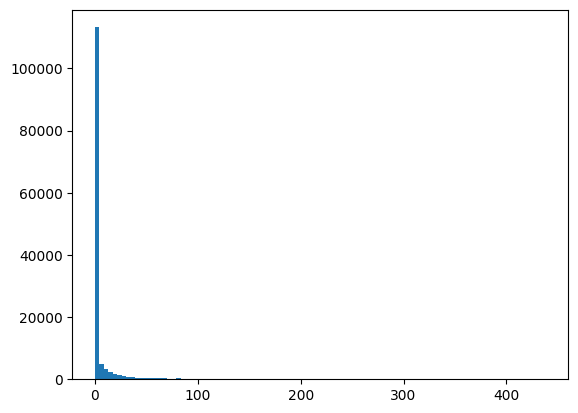

In [37]:
plt.hist(data[:, 15],bins = 100)

ValueError: num must be an integer with 1 <= num <= 22, not 23

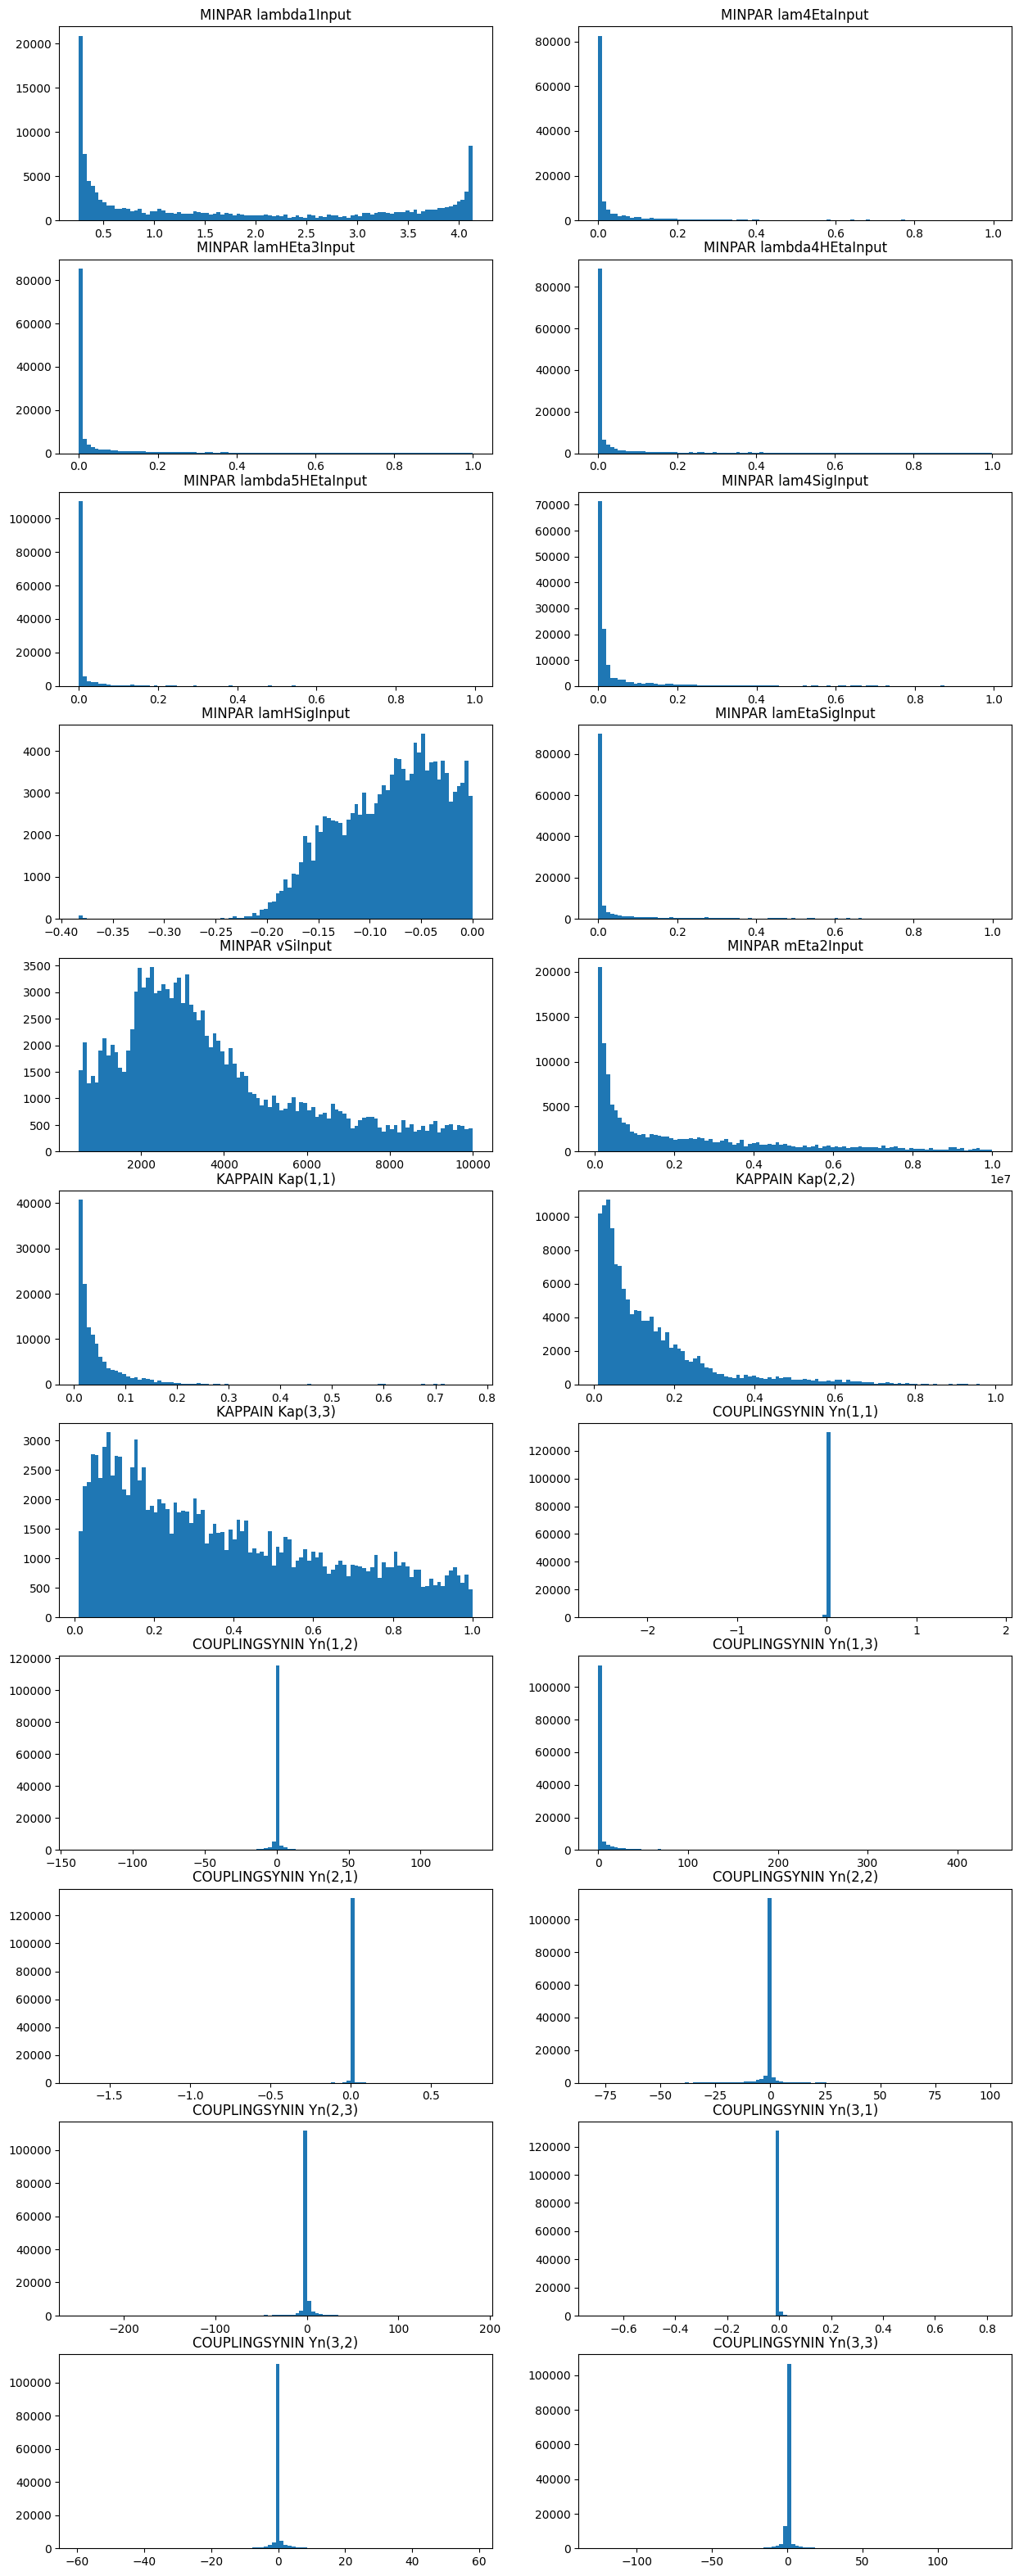

In [38]:
plt.figure(figsize=(15, 40))  # Ajusta el tamaño de la figura para 20 gráficos
for i in range(data.shape[1]):  # Iterar sobre las 20 columnas
    plt.subplot(11, 2, i + 1)  # Crear una subgráfica de 10 filas y 2 columnas
    plt.hist(data[:, i],bins = 100)  # Graficar la i-ésima columna
    plt.title(f'{df.columns[i]}')